In [36]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

In [2]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100, resize = 0.4)

In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
lfw.data.shape

(1140, 1850)

In [5]:
lfw.images.shape # rectangular images with shape 50*37 and 1140 images are there

(1140, 50, 37)

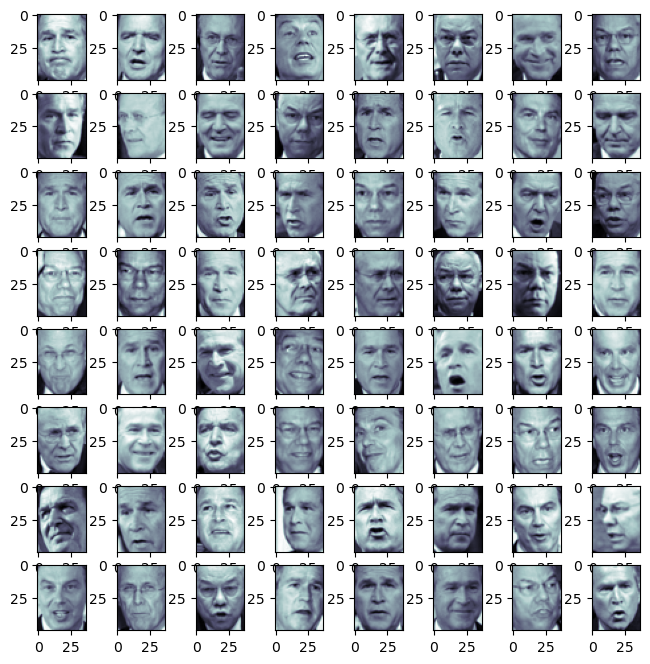

In [6]:
fig = plt.figure(figsize = (8,8)) 
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)  
    ax.imshow(lfw.images[i], cmap = plt.cm.bone)  # cmap means colormap  
plt.show()

In [7]:
x, y = lfw.data, lfw.target
pca_lfw = PCA()
pca_lfw.fit(x)

PCA()

In [9]:
k = 0
total = 0
while total < 0.99:
    total = total + pca_lfw.explained_variance_ratio_[k]
    k = k + 1
k

398

In [11]:
# Initialize PCA with the number of components determined earlier and apply whitening
pca_lfw = PCA(n_components=k, whiten=True)

# Transform the original data to the new PCA space
x_transformed = pca_lfw.fit_transform(x)

# Check the shape of the transformed data
x_transformed.shape


(1140, 398)

In [13]:
# Perform the inverse transform to approximate the original data
x_approx = pca_lfw.inverse_transform(x_transformed)

# Reshape the approximated data to the original image dimensions
x_approx = x_approx.reshape(1140, 50, 37)


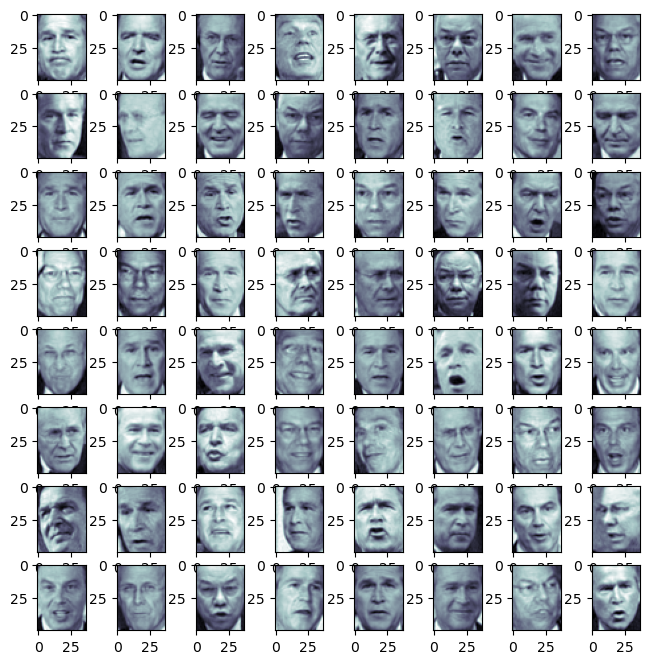

In [14]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8, i+1)
    ax.imshow(x_approx[i], cmap = plt.cm.bone)
plt.show()

In [16]:
pca_lfw.components_.shape
eigenv = pca_lfw.components_.reshape(k, 50, 37)

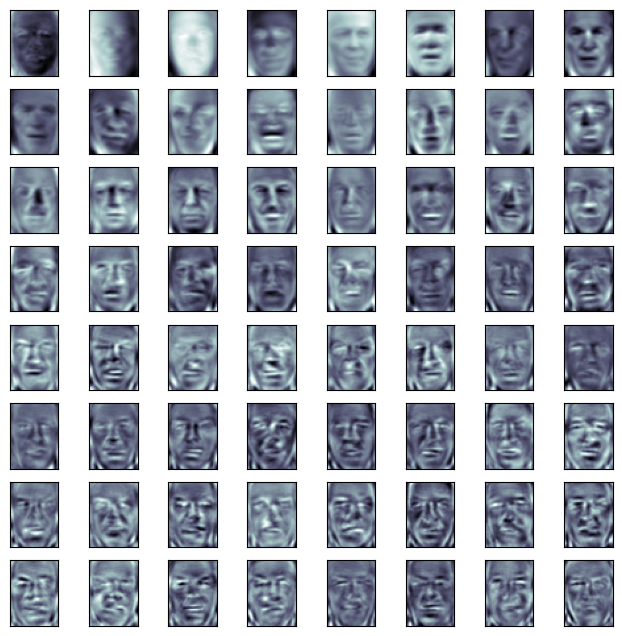

In [17]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8, i+1, xticks = [], yticks = [])
    ax.imshow(eigenv[i], cmap = plt.cm.bone)
plt.show()

Now we will use it as a classification problem, split the data into training and testing data then use different classifiers to get to know what is the performance like after applying PCA and before applying PCA

In [22]:
x, y = lfw.data, lfw.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
pca_lfw = PCA()
pca_lfw.fit(x_train)

PCA()

In [24]:
k = 0
total = 0
while total < 0.99:
    total = total + pca_lfw.explained_variance_ratio_[k]
    k = k+1
k

357

In [25]:
pca_lfw = PCA(n_components = k , whiten = True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 357)

In [26]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape((855,50,37))

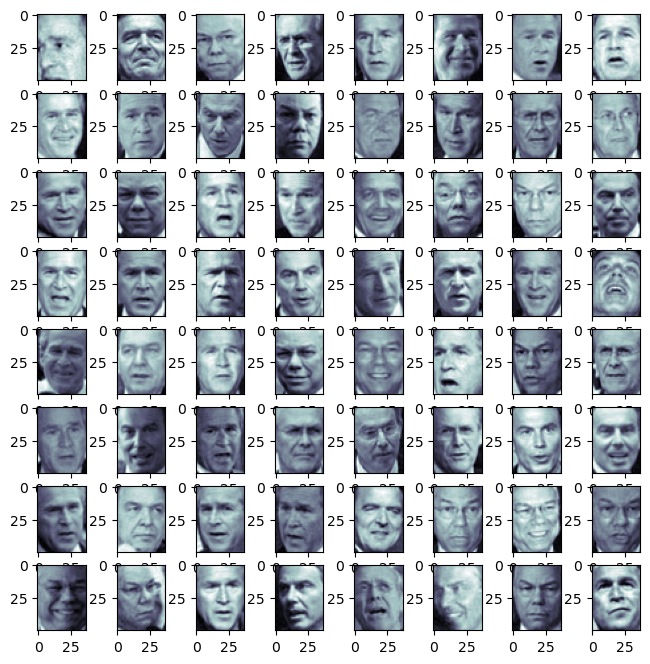

In [29]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8, i+1)
    ax.imshow(x_approx[i], cmap = plt.cm.bone)
plt.show()

In [30]:
pca_lfw.components_.shape
eigenv = pca_lfw.components_.reshape(k,50,37)

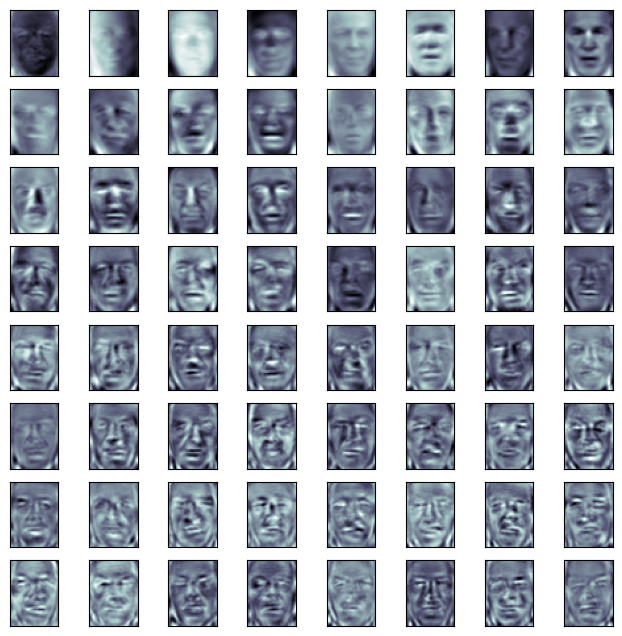

In [31]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8, i+1, xticks = [], yticks = [])
    ax.imshow(eigenv[i], cmap = plt.cm.bone)
plt.show()

In [33]:
# so till now we have used PCA on the training data and not on testing data

In [34]:
# now we have pca transformed training data(x_transformed)

In [35]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(x_test) # we have data after applying PCA

In [37]:
# Appling random forest

rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train) # without applying PCA
print(time.time() - start) # tells how much time it took to fit
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))


4.848760604858398
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        61
           1       0.86      0.17      0.28        36
           2       0.59      1.00      0.74       122
           3       1.00      0.16      0.28        31
           4       0.69      0.26      0.37        35

    accuracy                           0.66       285
   macro avg       0.80      0.47      0.50       285
weighted avg       0.74      0.66      0.60       285



In [38]:
print(confusion_matrix(y_test, y_pred))

[[ 47   0  14   0   0]
 [  5   6  23   0   2]
 [  0   0 122   0   0]
 [  1   1  22   5   2]
 [  1   0  25   0   9]]


In [40]:
# Appling random forest

rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca, y_train) # without applying PCA
print(time.time() - start) # tells how much time it took to fit
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test, y_pred))


2.892594814300537
              precision    recall  f1-score   support

           0       0.88      0.23      0.36        61
           1       0.00      0.00      0.00        36
           2       0.45      0.99      0.62       122
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        35

    accuracy                           0.47       285
   macro avg       0.26      0.24      0.20       285
weighted avg       0.38      0.47      0.34       285



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
